In [2]:
import pandas as pd

# Read a CSV file into a DataFrame
df = pd.read_csv('202211-divvy-tripdata.csv')

In [7]:
df.head

<bound method NDFrame.head of                 started_at           ride_id  rideable_type  \
0      2022-11-10 06:21:55  BCC66FC6FAB27CC7  electric_bike   
1      2022-11-04 07:31:55  772AB67E902C180F   classic_bike   
2      2022-11-21 17:20:29  585EAD07FDEC0152   classic_bike   
3      2022-11-25 17:29:34  91C4E7ED3C262FF9   classic_bike   
4      2022-11-29 17:24:25  709206A3104CABC8   classic_bike   
...                    ...               ...            ...   
255789 2022-11-09 14:22:29  03005DDB0F2F28E4   classic_bike   
255790 2022-11-22 16:57:53  B0B4E85DA43A9194   classic_bike   
255791 2022-11-06 13:04:05  8D148DD47B59530B   classic_bike   
255792 2022-11-06 09:41:29  0D1170BA18FD33D1   classic_bike   
255793 2022-11-26 11:59:28  09B20DC75B5EA1E0  electric_bike   

                  ended_at             start_station_name start_station_id  \
0      2022-11-10 06:31:27            Canal St & Adams St            13011   
1      2022-11-04 07:46:25            Canal St & Adams St

In [9]:
df.dropna(inplace=True)

In [10]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [11]:
df['Weekday'] = df['started_at'].dt.day_name()

In [12]:
print(df[['started_at', 'Weekday']].head())

           started_at   Weekday
0 2022-11-10 06:21:55  Thursday
1 2022-11-04 07:31:55    Friday
2 2022-11-21 17:20:29    Monday
3 2022-11-25 17:29:34    Friday
4 2022-11-29 17:24:25   Tuesday


In [13]:
df['Trip Duration (seconds)'] = (df['ended_at'] - df['started_at']).dt.total_seconds()

In [14]:
print(df[['started_at', 'ended_at', 'Trip Duration (seconds)']].head())

           started_at            ended_at  Trip Duration (seconds)
0 2022-11-10 06:21:55 2022-11-10 06:31:27                    572.0
1 2022-11-04 07:31:55 2022-11-04 07:46:25                    870.0
2 2022-11-21 17:20:29 2022-11-21 17:34:36                    847.0
3 2022-11-25 17:29:34 2022-11-25 17:45:15                    941.0
4 2022-11-29 17:24:25 2022-11-29 17:42:51                   1106.0


In [15]:
# Create a function to categorize the time of day
def categorize_time_of_day(timestamp):
    hour = timestamp.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

# Apply the categorize_time_of_day function to create the 'Time of the Day' column
df['Time of the Day'] = df['started_at'].apply(categorize_time_of_day)

# Print the first few rows to verify the new column
print(df[['started_at', 'Time of the Day']].head())

           started_at Time of the Day
0 2022-11-10 06:21:55         Morning
1 2022-11-04 07:31:55         Morning
2 2022-11-21 17:20:29         Evening
3 2022-11-25 17:29:34         Evening
4 2022-11-29 17:24:25         Evening


In [16]:
df['Month'] = df['started_at'].dt.strftime('%B')

# Print the first few rows to verify the new column
print(df[['started_at', 'Month']].head())

           started_at     Month
0 2022-11-10 06:21:55  November
1 2022-11-04 07:31:55  November
2 2022-11-21 17:20:29  November
3 2022-11-25 17:29:34  November
4 2022-11-29 17:24:25  November


In [17]:
# Convert the 'started_at' column to datetime if it's not already
df['started_at'] = pd.to_datetime(df['started_at'])

# Create a function to categorize the trip route
def categorize_trip_route(row):
    if row['start_station_id'] == row['end_station_id']:
        return 'Round Trip'
    else:
        return 'One Way'

# Apply the categorize_trip_route function to create the 'Trip Route Category' column
df['Trip Route Category'] = df.apply(categorize_trip_route, axis=1)

# Print the first few rows to verify the new column
print(df[['started_at', 'Trip Route Category']].head())

           started_at Trip Route Category
0 2022-11-10 06:21:55             One Way
1 2022-11-04 07:31:55             One Way
2 2022-11-21 17:20:29             One Way
3 2022-11-25 17:29:34             One Way
4 2022-11-29 17:24:25             One Way


In [12]:
from geopy.distance import geodesic
# Function to calculate distance using geopy
def calculate_distance(row):
    start_coords = (row['start_lat'], row['start_lng'])
    end_coords = (row['end_lat'], row['end_lng'])
    distance_km = geodesic(start_coords, end_coords).kilometers
    return round(distance_km, 1)


# Calculate the distance for each trip and store it in a new column
df['Distance Traveled (km)'] = df.apply(calculate_distance, axis=1)

# Print the dataset with the new "Distance Traveled" column
print(df[['start_lat', 'start_lng', 'end_lat', 'end_lng', 'Distance Traveled (km)']])

        start_lat  start_lng    end_lat    end_lng  Distance Traveled (km)
0       41.879401 -87.639848  41.894345 -87.622798                     2.2
1       41.879255 -87.639904  41.894345 -87.622798                     2.2
2       41.867888 -87.623041  41.894345 -87.622798                     2.9
3       41.867888 -87.623041  41.894345 -87.622798                     2.9
4       41.867888 -87.623041  41.894345 -87.622798                     2.9
...           ...        ...        ...        ...                     ...
255789  41.918216 -87.656936  41.921540 -87.653818                     0.5
255790  41.877708 -87.635321  41.928712 -87.653833                     5.9
255791  41.876243 -87.624426  41.867226 -87.615355                     1.3
255792  41.857506 -87.645991  41.867226 -87.615355                     2.8
255793  41.876272 -87.624576  41.867226 -87.615355                     1.3

[255794 rows x 5 columns]


# Data Overview

In [18]:
# Check the first few rows of the dataset
print(df.head())

           started_at           ride_id  rideable_type            ended_at  \
0 2022-11-10 06:21:55  BCC66FC6FAB27CC7  electric_bike 2022-11-10 06:31:27   
1 2022-11-04 07:31:55  772AB67E902C180F   classic_bike 2022-11-04 07:46:25   
2 2022-11-21 17:20:29  585EAD07FDEC0152   classic_bike 2022-11-21 17:34:36   
3 2022-11-25 17:29:34  91C4E7ED3C262FF9   classic_bike 2022-11-25 17:45:15   
4 2022-11-29 17:24:25  709206A3104CABC8   classic_bike 2022-11-29 17:42:51   

           start_station_name start_station_id        end_station_name  \
0         Canal St & Adams St            13011  St. Clair St & Erie St   
1         Canal St & Adams St            13011  St. Clair St & Erie St   
2  Indiana Ave & Roosevelt Rd           SL-005  St. Clair St & Erie St   
3  Indiana Ave & Roosevelt Rd           SL-005  St. Clair St & Erie St   
4  Indiana Ave & Roosevelt Rd           SL-005  St. Clair St & Erie St   

  end_station_id  start_lat  start_lng    end_lat    end_lng member_casual  \
0       

In [19]:
# Check the data types of columns
print(df.dtypes)

started_at                 datetime64[ns]
ride_id                            object
rideable_type                      object
ended_at                   datetime64[ns]
start_station_name                 object
start_station_id                   object
end_station_name                   object
end_station_id                     object
start_lat                         float64
start_lng                         float64
end_lat                           float64
end_lng                           float64
member_casual                      object
Weekday                            object
Trip Duration (seconds)           float64
Time of the Day                    object
Month                              object
Trip Route Category                object
Distance Traveled (km)            float64
Trip Duration (minutes)           float64
dtype: object


In [20]:
# Get summary statistics
print(df.describe())

           start_lat      start_lng        end_lat        end_lng  \
count  255794.000000  255794.000000  255794.000000  255794.000000   
mean       41.897332     -87.644645      41.896424     -87.642209   
std         0.044975       0.025331       0.238620       0.490802   
min        41.648501     -87.810000       0.000000     -87.830000   
25%        41.878119     -87.657259      41.878166     -87.658139   
50%        41.893992     -87.641796      41.894345     -87.642746   
75%        41.924626     -87.628682      41.925194     -87.629155   
max        42.064854     -87.528232      42.064854       0.000000   

       Trip Duration (seconds)  Distance Traveled (km)  \
count            255794.000000           255794.000000   
mean                759.992592                2.184235   
std                1569.616420               54.909466   
min               -3479.000000                0.000000   
25%                 296.000000                0.800000   
50%                 498.000000

# Data Cleaning

In [21]:
# Check for and remove duplicates based on specific columns (e.g., 'ride_id')
df.drop_duplicates(subset=['ride_id'], inplace=True)

In [22]:
# Convert categorical columns to category data type (e.g., 'member_casual')
df['member_casual'] = df['member_casual'].astype('category')

In [23]:
# Impute missing values with the mean of the column (e.g., 'Distance Traveled (km)')
mean_distance = df['Distance Traveled (km)'].mean()
df['Distance Traveled (km)'].fillna(mean_distance, inplace=True)

# Impute missing values with a value based on a condition (e.g., 'end_station_id' based on 'start_station_id')
df['end_station_id'].fillna(df['start_station_id'], inplace=True)


In [24]:
# Check for null values in the DataFrame
null_values = df.isnull()

# Count the number of null values in each column
null_counts = null_values.sum()

print(null_counts)

started_at                 0
ride_id                    0
rideable_type              0
ended_at                   0
start_station_name         0
start_station_id           0
end_station_name           0
end_station_id             0
start_lat                  0
start_lng                  0
end_lat                    0
end_lng                    0
member_casual              0
Weekday                    0
Trip Duration (seconds)    0
Time of the Day            0
Month                      0
Trip Route Category        0
Distance Traveled (km)     0
Trip Duration (minutes)    0
dtype: int64


In [25]:
# Create a new column 'Trip Duration (minutes)' by dividing 'Trip Duration (seconds)' by 60
df['Trip Duration (minutes)'] = df['Trip Duration (seconds)'] / 60

In [26]:
print(df.columns)


Index(['started_at', 'ride_id', 'rideable_type', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Weekday', 'Trip Duration (seconds)',
       'Time of the Day', 'Month', 'Trip Route Category',
       'Distance Traveled (km)', 'Trip Duration (minutes)'],
      dtype='object')


In [27]:
temporarily_indexed_df = df.set_index('started_at', drop=False)

# Perform the desired operation, e.g., resample to calculate daily trip counts
daily_trip_counts = temporarily_indexed_df.resample('D').size()

print(daily_trip_counts)
# Resample data to monthly frequency and calculate average trip duration for each month
monthly_avg_duration = temporarily_indexed_df.resample('M')['Trip Duration (seconds)'].mean()
print(monthly_avg_duration)

started_at
2022-11-01    14556
2022-11-02    15582
2022-11-03    16402
2022-11-04    12805
2022-11-05     7375
2022-11-06    12281
2022-11-07    10928
2022-11-08    11263
2022-11-09    13679
2022-11-10    16548
2022-11-11    10371
2022-11-12     6329
2022-11-13     6182
2022-11-14     7698
2022-11-15     4631
2022-11-16     6422
2022-11-17     6864
2022-11-18     4862
2022-11-19     3127
2022-11-20     3070
2022-11-21     6453
2022-11-22     7412
2022-11-23     7946
2022-11-24     3949
2022-11-25     5776
2022-11-26     6847
2022-11-27     3731
2022-11-28     7608
2022-11-29     9137
2022-11-30     5960
Freq: D, dtype: int64
started_at
2022-11-30    759.992592
Freq: M, Name: Trip Duration (seconds), dtype: float64


# Data Visualisation

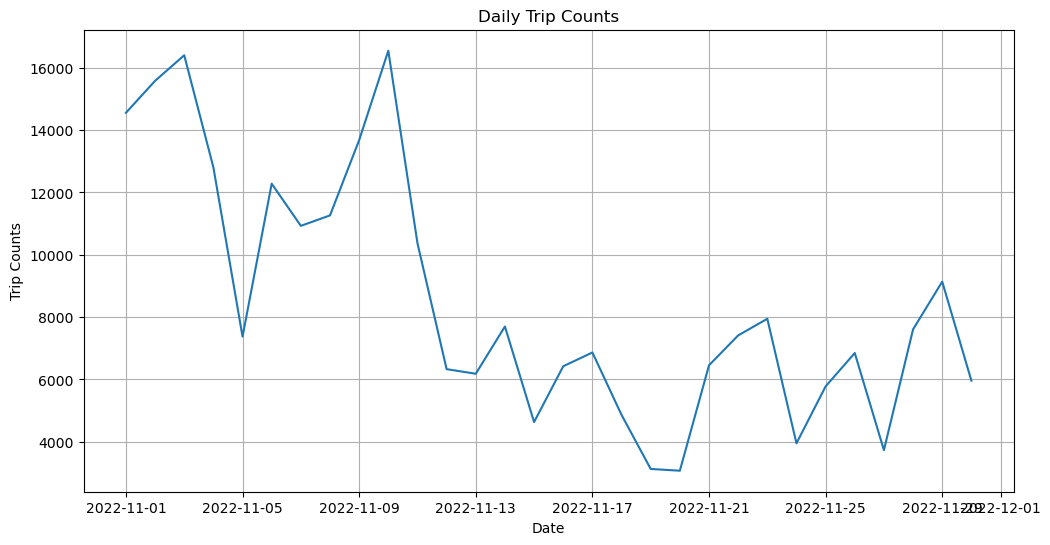

In [28]:
import matplotlib.pyplot as plt

# Plot daily trip counts
plt.figure(figsize=(12, 6))
plt.plot(daily_trip_counts.index, daily_trip_counts.values)
plt.title('Daily Trip Counts')
plt.xlabel('Date')
plt.ylabel('Trip Counts')
plt.grid(True)
plt.show()

# Plot monthly average trip duration
#plt.figure(figsize=(12, 6))
#plt.plot(monthly_avg_duration.index, monthly_avg_duration.values)
#plt.title('Monthly Average Trip Duration')
#plt.xlabel('Month')
#plt.ylabel('Average Duration (seconds)')
#plt.grid(True)
#plt.show()


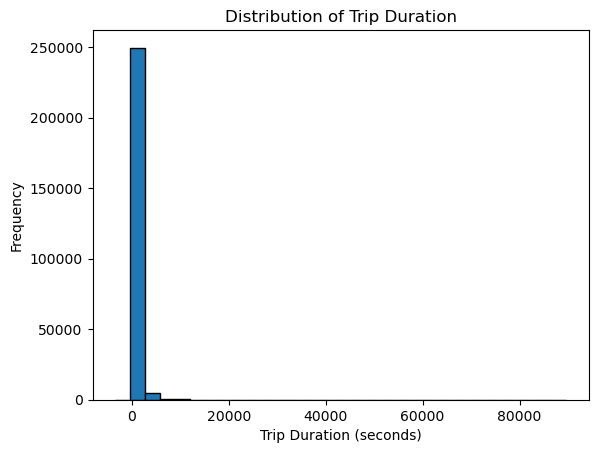

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of trip durations
plt.hist(df['Trip Duration (seconds)'], bins=30, edgecolor='k')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Duration')
plt.show()

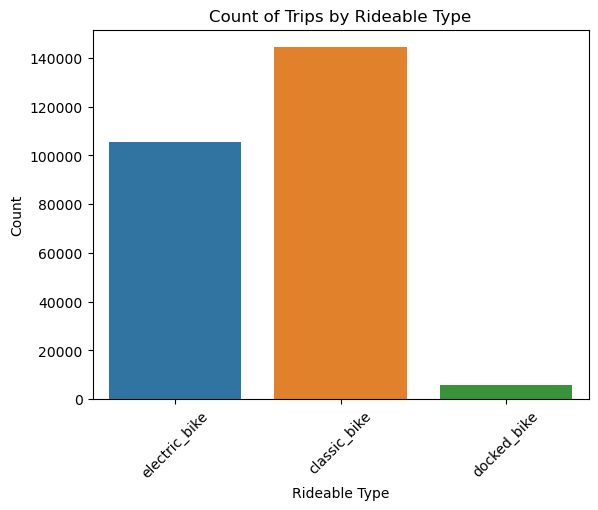

In [30]:
# Example: Countplot of rideable types
sns.countplot(x='rideable_type', data=df)
plt.xlabel('Rideable Type')
plt.ylabel('Count')
plt.title('Count of Trips by Rideable Type')
plt.xticks(rotation=45)
plt.show()

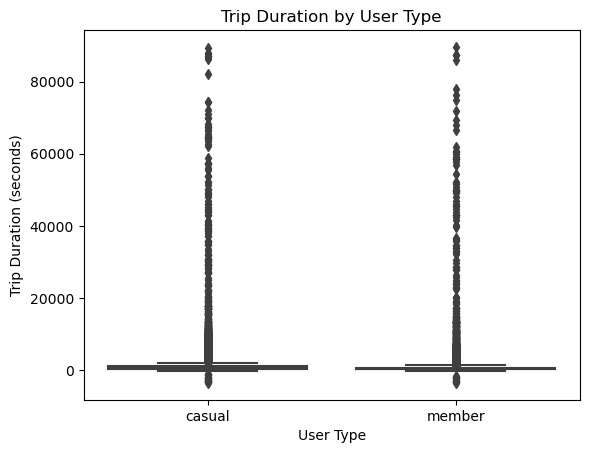

In [31]:
# Example: Boxplot of trip durations by user type
sns.boxplot(x='member_casual', y='Trip Duration (seconds)', data=df)
plt.xlabel('User Type')
plt.ylabel('Trip Duration (seconds)')
plt.title('Trip Duration by User Type')
plt.show()

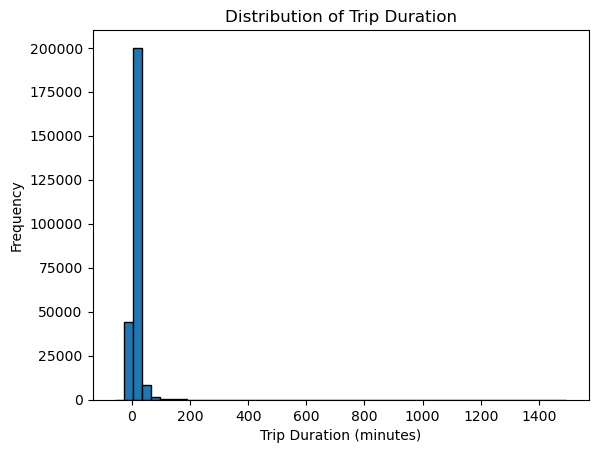

In [32]:
# Example: Histogram of trip durations
plt.hist(df['Trip Duration (minutes)'], bins=50, edgecolor='k')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Duration')
plt.show()

In [34]:
df.to_csv('202211-divvy-tripdata.csv', index=False) 